In [38]:
import numpy as np 
import pandas as pd
from sklearn.datasets import fetch_openml


In [39]:
mnist = fetch_openml('mnist_784' , version = 1)

In [40]:
df = pd.DataFrame(mnist.data)
df["target"] = mnist.target

In [41]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [42]:
df.shape

(70000, 785)

In [43]:
df.sample()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
import matplotlib.pyplot as plt

In [45]:
df = df.apply(pd.to_numeric , errors = 'coerce')

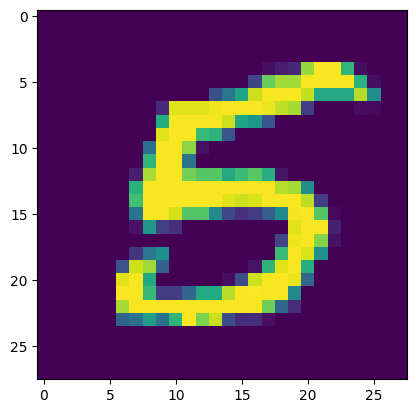

In [46]:
plt.imshow(df.iloc[20000 , :-1].values.reshape(28 , 28))

In [47]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]


In [48]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=42)

In [49]:
X_train.shape

(56000, 784)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier()

In [52]:
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [59]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

C:\Users\umark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


27.721182584762573


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , y_pred)

0.9700714285714286

In [ ]:
from sklearn.preprocessing  import StandardScaler
scaler = StandardScaler()

In [54]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [55]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [56]:
X_train_pca.shape

(56000, 100)

In [57]:
knn_pca = KNeighborsClassifier()

In [58]:
knn_pca.fit(X_train_pca , y_train)

KNeighborsClassifier()

In [60]:
start =time.time()
y_pred_pca = knn_pca.predict(X_test_pca)
print(time.time() - start)


2.6059927940368652


In [61]:
accuracy_score(y_test , y_pred_pca)

0.9587857142857142

In [63]:
for i in range(1 , 785):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    knn_pca = KNeighborsClassifier()

    knn_pca.fit(X_train_pca , y_train)

    y_pred_pca = knn_pca.predict(X_test_pca)

    print(accuracy_score(y_test , y_pred_pca))

0.25642857142857145
0.32107142857142856
0.5111428571428571
0.6697142857142857
0.7385
0.8270714285714286
0.8442142857142857
0.8766428571428572
0.8907142857142857
0.9115
0.9192142857142858
0.924
0.9306428571428571
0.9371428571428572
0.9414285714285714
0.9436428571428571
0.9441428571428572
0.9450714285714286
0.9486428571428571
0.9484285714285714


KeyboardInterrupt: 